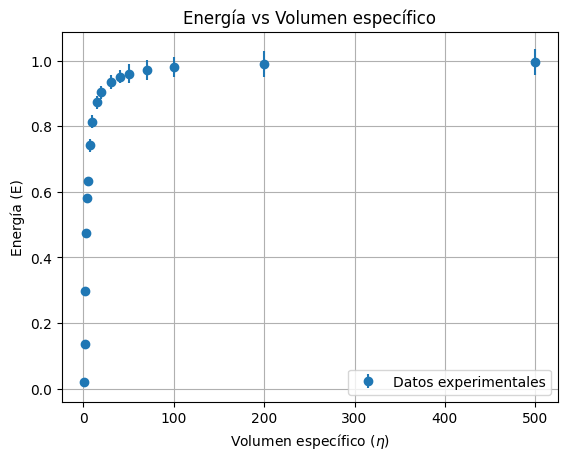

In [2]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.genfromtxt("datos-c2.txt")

n = datos[:, 0]
E = datos[:, 1]
desv = datos[:, 2]

plt.errorbar(n, E, yerr=desv, fmt='o', label='Datos experimentales')
plt.ylabel('Energía (E)')
plt.xlabel('Volumen específico ($\\eta$)')
plt.title('Energía vs Volumen específico')
plt.grid(True)
plt.legend()
plt.savefig("g1.pdf")


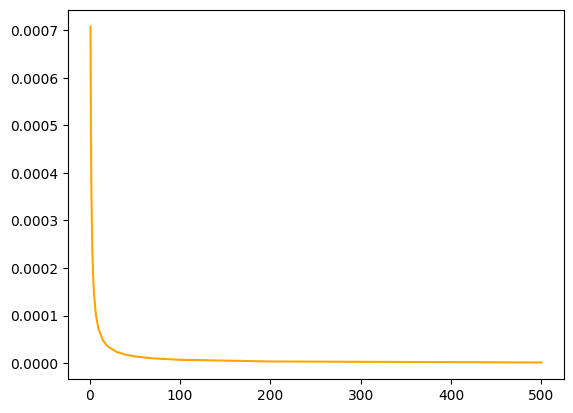

In [3]:
a, b = np.polyfit(n, E, 1)

def f(a, b, n):
    return a * b/n

plt.plot(n, f(a, b, n), label='Ajuste teórico', color='orange')

Parámetros del ajuste:
a = 0.8608791235711124
b = -0.951678503849874


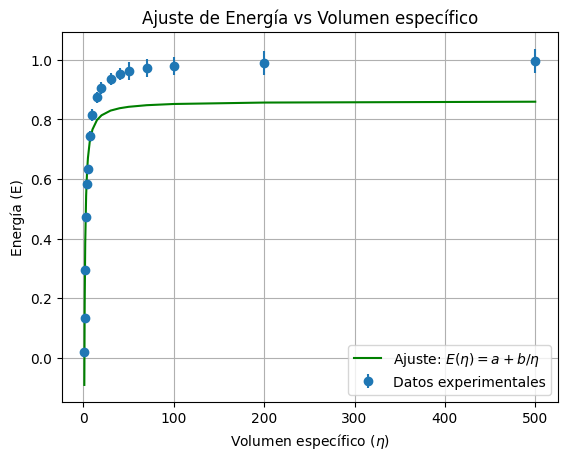

In [4]:
#Considerando el siguiente modelo para ajustar los datos:
# E = a + b/n

def modelo(n, a, b):
    return a + b/n

#Se utiliza el metodo de mínimos cuadrados para ajustar el modelo a los datos
from scipy.optimize import curve_fit

parametros, covarianza = curve_fit(modelo, n, E, sigma=desv)
a, b = parametros

E_ajustado = modelo(n, a, b)

plt.errorbar(n, E, yerr=desv, fmt='o', label='Datos experimentales')
plt.plot(n, E_ajustado, label='Ajuste: $E(\\eta) = a + b/\\eta $', color='green')
plt.ylabel('Energía (E)')
plt.xlabel('Volumen específico ($\\eta$)')
plt.title('Ajuste de Energía vs Volumen específico')
plt.grid(True)
plt.legend()
plt.savefig("g2.pdf")

print(f"Parámetros del ajuste:\na = {a}\nb = {b}")

In [5]:
# Error de los parametros a y b
error_a = np.sqrt(covarianza[0, 0])
error_b = np.sqrt(covarianza[1, 1])

print(f"Errores de los parámetros:\nError en a = {error_a}\nError en b = {error_b}")

Errores de los parámetros:
Error en a = 0.032194337307351766
Error en b = 0.06448461653654712


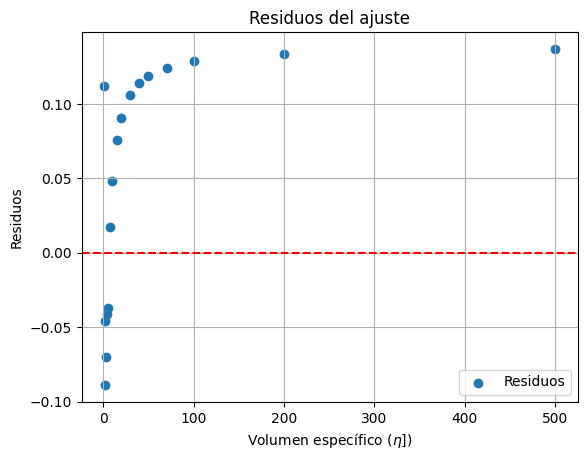

In [6]:
# Grafico de residuos

residuos = E - E_ajustado

plt.scatter(n, residuos, label='Residuos')
plt.ylabel('Residuos')
plt.xlabel('Volumen específico ($\\eta$])')
plt.title('Residuos del ajuste')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

### Analísis de los residuos

En el grafico de los residuos se puede notar un patron, esto indica que el modelo lineal no es el mas adecuado para los datos. Se podria intentar con un modelo polinomial de grado mayor para ver si se ajusta mejor a los datos.

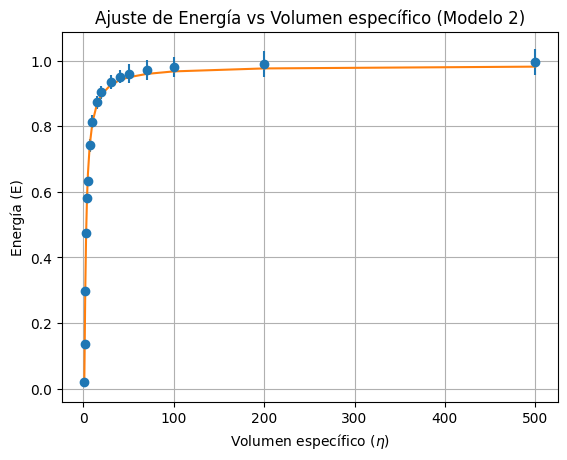

In [7]:
#Se considerara el siguiente modelo para ajustar los datos:
# E = a + b/n + c/n^2

def modelo2(n, a, b, c):
    return a + b/n + c/n**2

parametros2, covarianza2 = curve_fit(modelo2, n, E, sigma=desv)
a2, b2, c2 = parametros2
E_ajustado2 = modelo2(n, a2, b2, c2)

plt.errorbar(n, E, yerr=desv, fmt='o', label='Datos experimentales')
plt.plot(n, E_ajustado2, label='Ajuste: $E(\\eta) = a + b/\\eta + c/\\eta^2 $')
plt.ylabel('Energía (E)')
plt.xlabel('Volumen específico ($\\eta$)')
plt.title('Ajuste de Energía vs Volumen específico (Modelo 2)')
plt.grid(True)
plt.savefig("g3.pdf")


In [8]:
#Error de los parametros a, b y c

error_a2 = np.sqrt(covarianza2[0, 0])
error_b2 = np.sqrt(covarianza2[1, 1])
error_c2 = np.sqrt(covarianza2[2, 2])

print(f"Parámetros del ajuste (Modelo 2):\na = {a2}\nb = {b2}\nc = {c2}")

print(f"Errores de los parámetros (Modelo 2):\nError en a = {error_a2}\nError en b = {error_b2}\nError en c = {error_c2}")

Parámetros del ajuste (Modelo 2):
a = 0.9855865726630274
b = -1.822328397069467
c = 0.8635672086321897
Errores de los parámetros (Modelo 2):
Error en a = 0.006148343376600378
Error en b = 0.03169270053021924
Error en c = 0.030235692307732837


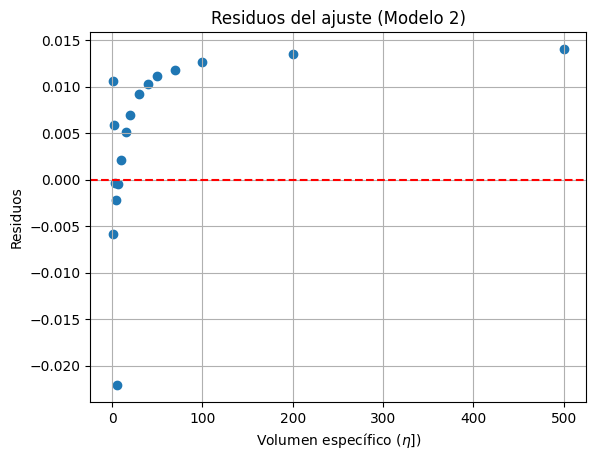

In [9]:
#Residuos del segundo modelo

residuos2 = E - E_ajustado2

plt.scatter(n, residuos2, label='Residuos Modelo 2')
plt.ylabel('Residuos')
plt.xlabel('Volumen específico ($\\eta$])')
plt.title('Residuos del ajuste (Modelo 2)')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

### Analísis de los residuos con modelo 2

Podemos notar que el orden de los residuos es menor, pero aun asi se observa un patron en los residuos. Esto indica que el modelo polinomial de grado 2 es mejor que el lineal, pero aun no es el mas adecuado para los datos.